# 株価予測のための AR 1 モデルの構築

株価予測にARMAモデルを使用する

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA

In [18]:
from statsmodels.graphics.tsaplots import plot_predict

日付をインデックスとして使用してデータをロードする

In [2]:
cleandata = pd.read_csv('time-series-prediction\price_clean_full_asc.csv',parse_dates=True,index_col='date')

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\user\AppData\Local\Temp\ipykernel_24056\288528175.py:1: SyntaxWarning: invalid escape sequence '\p'
  cleandata = pd.read_csv('time-series-prediction\price_clean_full_asc.csv',parse_dates=True,index_col='date')


In [14]:
cleandata.iloc[7200]

close     9.620000e+01
open      9.920000e+01
high      9.930000e+01
low       9.610000e+01
change   -2.240000e-02
volume    1.433100e+08
Name: 2016-05-26 00:00:00, dtype: float64

# トレーニングテストの分割

トレーニングデータは2004年から2020年半ばまで <br>
テストデータは2020年半ばから2024年半ばまで

In [43]:
df_train=cleandata[4200:8200][['close']].astype('float32')
df_train

,close
date,
2004-02-25,50.500000
2004-02-26,50.000000
2004-02-27,50.599998
2004-03-01,51.799999
2004-03-02,53.000000
...,...
2020-06-23,100.599998
2020-06-24,100.400002
2020-06-25,99.599998


In [49]:
df_test=cleandata[8200:][['close']].astype('float32')
df_test

,close
date,
2020-06-30,100.599998
2020-07-01,98.400002
2020-07-02,98.900002
2020-07-03,99.099998
2020-07-06,100.800003
...,...
2024-07-26,157.899994
2024-07-29,159.699997
2024-07-30,158.699997


## AR1

In [17]:
modelar1 = ARIMA(df_train["close"], order = (1,0,0))

fitar1 = modelar1.fit()

fitar1.summary()

c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 4000
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -6016.914
Date:                Thu, 02 Jan 2025   AIC                          12039.827
Time:                        14:27:23   BIC                          12058.709
Sample:                             0   HQIC                         12046.520
                               - 4000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.2108     28.030      2.291      0.022       9.273     119.149
ar.L1          0.9993      0.001   1370.990      0.000       0.998       1.001
sigma2         1.1840      0.010    113.740      0.000       1.164       1.204
===================================================================================
Ljung-Box (L1) (Q):                  22.39   Jarque-Bera (JB):             21172.26
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.54   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

株価のプロットモデル予測

罠に注意してください

1ステップ先の予測を行った後、将来の価格値はモデルに提供されません。

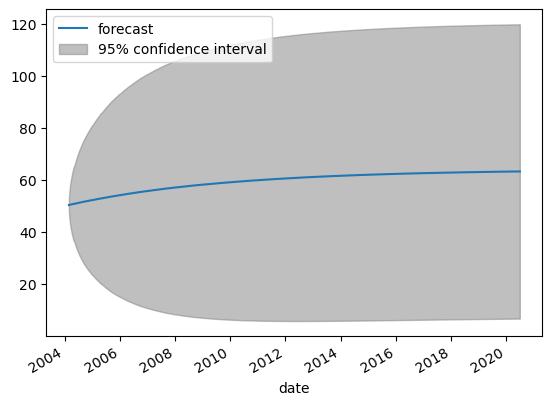

In [20]:
plot_predict(fitar1, start=1, dynamic=True);

将来の価格値は、1ステップ先の予測を行った後にモデルに提供されます。

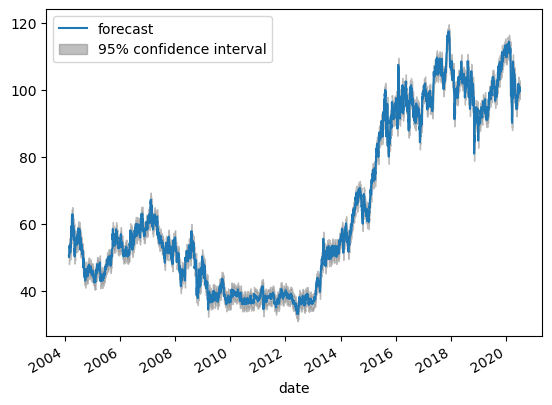

In [21]:
plot_predict(fitar1, start=1, dynamic=False);

実際の株価

<Axes: xlabel='date'>

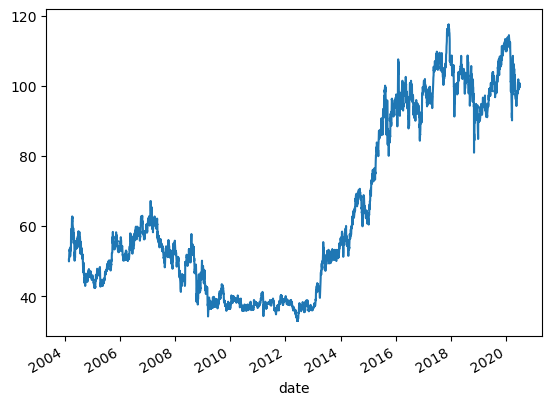

In [50]:
cleandata['close'].iloc[4200:8200].plot()

## AR1モデルの予測

In [52]:
fitar1.predict( start=8000,end=8200,dynamic=True)

c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


8000    66.309912
8001    66.308423
8002    66.306935
8003    66.305448
8004    66.303962
          ...    
8196    66.037376
8197    66.036080
8198    66.034786
8199    66.033492
8200    66.032199
Name: predicted_mean, Length: 201, dtype: float64

c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\user\.conda\envs\PT\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


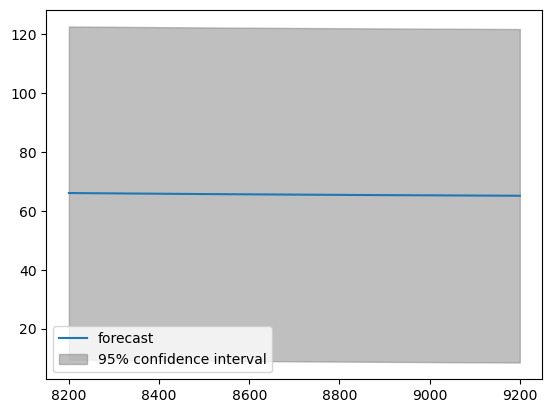

In [58]:
plot_predict(fitar1, start=8200,end=9200);

<Axes: xlabel='date'>

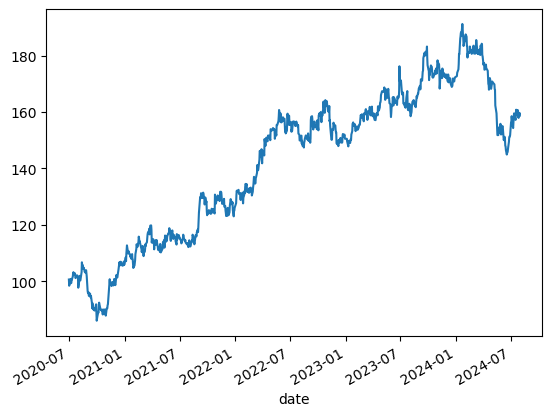

In [59]:
cleandata['close'].iloc[8200:9200].plot()